In [189]:
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
# import get_sentiment_score as gss

#load dataset
df = pd.read_csv('raw_data/tmdb_5000_credits.csv')
df.head() #view data

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [190]:
score = np.zeros(len(df.index)) #initalize scores
castsize = np.zeros(len(df.index), dtype=int) #initialize case sizes
g =[0]*len(df.index) #initialize gender list for all movies
wanttoweight = True #do you want to weight lead roles?
for m in df.index: #loop over all movies
    m_all = True #debug boolean
    #extract movie
    cast = json.loads(df['cast'][m]) #extract cast from dataset
    castsize[m] = len(cast) #number of cast members
    gendernos = np.zeros(castsize[m])
    if castsize[m] == 0 or castsize[m] == []: #no cast listed
        score[m] = np.nan #nan for no cast
        m_all = False #debug boolean
    else:
        if wanttoweight:
            #asymmetrical sigmoidal curve fit from https://mycurvefit.com/
            weights = [ 0.00557557 + (1.002644 - 0.00557557)/(1 + (x/1.794024)**8.661941)**0.5556762
               for x in np.linspace(1,10,20)] #weight lead roles more (up to 20 roles)
        else:
            weights = np.ones(20)
        if castsize[m] > 20: #more than 20 memebrs in cast
            ind = range(0,20)
        else: #less than 20 members in cast
            ind = range(0,castsize[m])
        for c in ind: #loop over all cast members
            gendernos[c] = cast[c]['gender']
            if cast[c]['gender'] == 1: #female
                score[m] = score[m] + weights[c] #female cast members boost score
                m_all = False #debug boolean
            elif cast[c]['gender'] != 2: #not female nor male gender number
                weights[c] = 0; #discount entry
        score[m] = score[m]/sum(weights[:c+1]) #take the weighted average of the score
        g[m] = gendernos #store gender numbers into gender list
        if score[m] == np.inf:
            score[m] = np.nan
            m_all = False #debug boolean
    #DEBUGGING ONLY
    #if m_all:
         #score[m] = -1
#put scores into dataframe
df['gender diversity score'] = score
df

/Users/rachelfranz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # This is added back by InteractiveShellApp.init_path()
/Users/rachelfranz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


,movie_id,title,cast,crew,gender diversity score
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",0.532074
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",0.187119
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",0.233717
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",0.101576
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",0.495550
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...",0.344884
6,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de...",0.502234
7,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...",0.046642
8,767,Harry Potter and the Half-Blood Prince,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de...",0.203632
9,209112,Batman v Superman: Dawn of Justice,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de...",0.293471


In [191]:
sentiment_df = pd.read_csv('sentiment_scores.csv')
df = df.set_index('movie_id')

In [203]:
for index, row in sentiment_df.iterrows():
    curr_movie_id = sentiment_df.at[index,'movie_id']
    sentiment_score = sentiment_df.at[index, "sentiment_score"]
    df.at[curr_movie_id, "sentiment_score"] = sentiment_score

In [204]:
#extract nan values to find real score
score_real = score[np.argwhere(~np.isnan(score))]
len(score_real) #check size of real values

4717

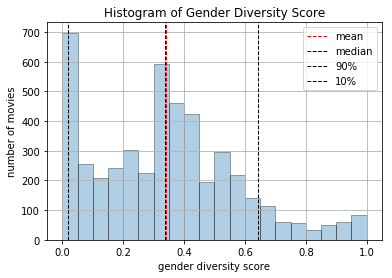

In [205]:
#plot results of all movies
n_bins = 20
fig, ax = plt.subplots()
n, bins, patches = plt.hist(score_real, bins=n_bins, alpha=0.35, edgecolor='k')
ax.set(xlabel='gender diversity score', ylabel='number of movies',
       title='Histogram of Gender Diversity Score')
ax.grid()
mean = plt.axvline(score_real.mean(), color='r', linestyle='dashed', linewidth=1)
median = plt.axvline(np.percentile(score_real,50), color='k', linestyle='dashed', linewidth=1)
#plt.axvline(np.percentile(score_real,25), color='r', linestyle='dashed', linewidth=1)
#plt.axvline(np.percentile(score_real,75), color='r', linestyle='dashed', linewidth=1)
ninety = plt.axvline(np.percentile(score_real,90), color='k', linestyle='dashed', linewidth=1)
ten = plt.axvline(np.percentile(score_real,10), color='k', linestyle='dashed', linewidth=1)
ax.legend((mean, median, ninety, ten), ('mean','median','90%','10%'))


In [206]:
#create subset
df_subset = pd.DataFrame(columns=list(df)) #initialize
df_real = df.dropna() #get rid of nans
strata = 10 #how many data strata do we want?
subsetno = 100 #how large do we want the subset to be
edges = np.linspace(0,1,strata+1) #edges of data strata
for i in range(0,strata):
    df_temp = df_real[(df_real['gender diversity score'] > edges[i]) &
                      (df_real['gender diversity score'] < edges[i+1])]
    temp_ind = np.round(np.linspace(0,len(df_temp)-1,subsetno/strata))
    df_subset = pd.concat([df_subset, 
                         df_temp.sort_values(by=['gender diversity score']).iloc[temp_ind,:].reset_index(drop=True)], 
                         ignore_index=True)
df_subset
#json.loads(df_subset['cast'][4]) #if you want to query a specific movie

/Users/rachelfranz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


,movie_id,title,cast,crew,gender diversity score,sentiment_score
0,387.0,Das Boot,"[{""cast_id"": 1, ""character"": ""Kapit\u00e4n-Leu...","[{""credit_id"": ""52fe423dc3a36847f800eb0d"", ""de...",0.001949,0.890909
1,11176.0,The Muppet Movie,"[{""cast_id"": 1, ""character"": ""Kermit the Frog ...","[{""credit_id"": ""52fe44089251416c75026ab7"", ""de...",0.006318,0.790772
2,9533.0,Red Dragon,"[{""cast_id"": 1, ""character"": ""Hannibal Lecter""...","[{""credit_id"": ""52fe4505c3a36847f80b7b55"", ""de...",0.010899,0.851380
3,277216.0,Straight Outta Compton,"[{""cast_id"": 13, ""character"": ""Ice Cube"", ""cre...","[{""credit_id"": ""56829e7392514169d000046c"", ""de...",0.024433,0.864865
4,9804.0,Waterworld,"[{""cast_id"": 1, ""character"": ""Mariner"", ""credi...","[{""credit_id"": ""558df16192514173dd0006ff"", ""de...",0.034758,0.842105
5,300673.0,The Finest Hours,"[{""cast_id"": 0, ""character"": ""Bernie Webber"", ...","[{""credit_id"": ""56e4d210c3a3685aa8004f7d"", ""de...",0.037887,0.956204
6,84197.0,Filly Brown,"[{""cast_id"": 1002, ""character"": ""Linda"", ""cred...","[{""credit_id"": ""52fe48e09251416c9109b2fd"", ""de...",0.040096,0.874126
7,72431.0,Red Tails,"[{""cast_id"": 2, ""character"": ""Colonel William ...","[{""credit_id"": ""53677d8c0e0a2647c4005769"", ""de...",0.078485,0.841897
8,66195.0,The Perfect Host,"[{""cast_id"": 1, ""character"": ""Warwick Wilson"",...","[{""credit_id"": ""52fe4730c3a368484e0b9927"", ""de...",0.086259,0.804598
9,10673.0,Wall Street,"[{""cast_id"": 8, ""character"": ""Bud Fox"", ""credi...","[{""credit_id"": ""52fe43a09251416c75017bd9"", ""de...",0.099810,0.870488


In [197]:
len(df_subset)

100

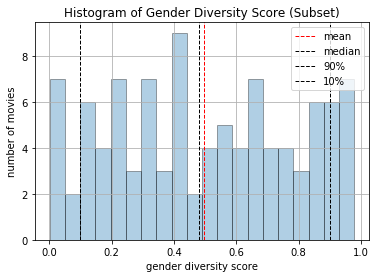

In [198]:
#plot subset results
subset_scores = df_subset['gender diversity score'][:]
n_bins = 20
fig, ax = plt.subplots()
n, bins, patches = plt.hist(subset_scores, bins=n_bins, alpha=0.35, edgecolor='k')
ax.set(xlabel='gender diversity score', ylabel='number of movies',
       title='Histogram of Gender Diversity Score (Subset)')
ax.grid()
mean = plt.axvline(subset_scores.mean(), color='r', linestyle='dashed', linewidth=1)
median = plt.axvline(np.percentile(subset_scores,50), color='k', linestyle='dashed', linewidth=1)
#plt.axvline(np.percentile(subset_scores,25), color='r', linestyle='dashed', linewidth=1)
#plt.axvline(np.percentile(subset_scores,75), color='r', linestyle='dashed', linewidth=1)
ninety = plt.axvline(np.percentile(subset_scores,90), color='k', linestyle='dashed', linewidth=1)
ten = plt.axvline(np.percentile(subset_scores,10), color='k', linestyle='dashed', linewidth=1)
ax.legend((mean, median, ninety, ten), ('mean','median','90%','10%'))

In [199]:
max(castsizes_real)

NameError: name 'castsizes_real' is not defined

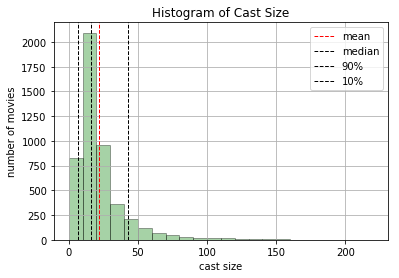

In [200]:
#plot cast distribution
castsizes_real = castsize[np.argwhere(~np.isnan(castsize))]
binwidth =10
n_bins = range(0, int(10*np.floor(max(castsizes_real)/10)) + binwidth, binwidth)
fig, ax = plt.subplots()
n, bins, patches = plt.hist(castsizes_real, bins=n_bins, alpha=0.35, edgecolor='k', facecolor='g')
ax.set(xlabel='cast size', ylabel='number of movies',
       title='Histogram of Cast Size')
ax.grid()
mean = plt.axvline(castsizes_real.mean(), color='r', linestyle='dashed', linewidth=1)
median = plt.axvline(np.percentile(castsizes_real,50), color='k', linestyle='dashed', linewidth=1)
#plt.axvline(np.percentile(castsizes_real,25), color='r', linestyle='dashed', linewidth=1)
#plt.axvline(np.percentile(castsizes_real,75), color='r', linestyle='dashed', linewidth=1)
ninety = plt.axvline(np.percentile(castsizes_real,90), color='k', linestyle='dashed', linewidth=1)
ten = plt.axvline(np.percentile(castsizes_real,10), color='k', linestyle='dashed', linewidth=1)
ax.legend((mean, median, ninety, ten), ('mean','median','90%','10%'))

In [201]:
#save subset
df_subset.to_csv('imdb_subset_100_10strats')


In [202]:
df_subset

,movie_id,title,cast,crew,gender diversity score,sentiment_score
0,387.0,Das Boot,"[{""cast_id"": 1, ""character"": ""Kapit\u00e4n-Leu...","[{""credit_id"": ""52fe423dc3a36847f800eb0d"", ""de...",0.001949,0.890909
1,11176.0,The Muppet Movie,"[{""cast_id"": 1, ""character"": ""Kermit the Frog ...","[{""credit_id"": ""52fe44089251416c75026ab7"", ""de...",0.006318,0.790772
2,9533.0,Red Dragon,"[{""cast_id"": 1, ""character"": ""Hannibal Lecter""...","[{""credit_id"": ""52fe4505c3a36847f80b7b55"", ""de...",0.010899,0.851380
3,277216.0,Straight Outta Compton,"[{""cast_id"": 13, ""character"": ""Ice Cube"", ""cre...","[{""credit_id"": ""56829e7392514169d000046c"", ""de...",0.024433,0.864865
4,9804.0,Waterworld,"[{""cast_id"": 1, ""character"": ""Mariner"", ""credi...","[{""credit_id"": ""558df16192514173dd0006ff"", ""de...",0.034758,0.842105
5,300673.0,The Finest Hours,"[{""cast_id"": 0, ""character"": ""Bernie Webber"", ...","[{""credit_id"": ""56e4d210c3a3685aa8004f7d"", ""de...",0.037887,0.956204
6,84197.0,Filly Brown,"[{""cast_id"": 1002, ""character"": ""Linda"", ""cred...","[{""credit_id"": ""52fe48e09251416c9109b2fd"", ""de...",0.040096,0.874126
7,72431.0,Red Tails,"[{""cast_id"": 2, ""character"": ""Colonel William ...","[{""credit_id"": ""53677d8c0e0a2647c4005769"", ""de...",0.078485,0.841897
8,66195.0,The Perfect Host,"[{""cast_id"": 1, ""character"": ""Warwick Wilson"",...","[{""credit_id"": ""52fe4730c3a368484e0b9927"", ""de...",0.086259,0.804598
9,10673.0,Wall Street,"[{""cast_id"": 8, ""character"": ""Bud Fox"", ""credi...","[{""credit_id"": ""52fe43a09251416c75017bd9"", ""de...",0.099810,0.870488
